# **10.4.15**


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [33]:
# Начальные условия
UA, UB = 3, -3
a, b = 1.5 ,2.5
h = (b - a)/150
N = 150

def k(x):
    return x**(-1/3)

def f(x):
    return x + np.sqrt(x)

In [3]:
def finite_difference_variable_k(N, k, f):
    x = np.linspace(a, b, N+1)
    A = np.zeros((N+1, N+1))  # Матрица коэффициентов
    B = np.zeros(N+1)  # Правая часть

    # Заполняем систему уравнений
    for i in range(1, N):
        k_i_p_half = (k(x[i]) + k(x[i+1])) / 2  # k_{i+1/2}
        k_i_m_half = (k(x[i]) + k(x[i-1])) / 2  # k_{i-1/2}

        A[i, i-1] = -k_i_m_half / h**2
        A[i, i] = (k_i_p_half + k_i_m_half) / h**2
        A[i, i+1] = -k_i_p_half / h**2

        B[i] = f(x[i])

    # Граничные условия
    A[0, 0] = 1
    B[0] = UA
    A[N, N] = 1
    B[N] = UB

    u = np.linalg.solve(A, B)
    return x, u

## 3.1 Стержень состоит из двух материалов с различными свойствами

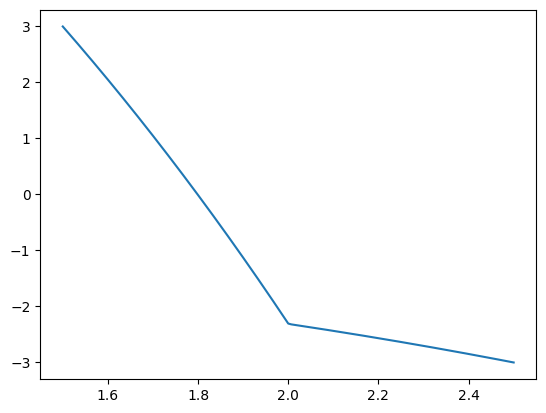

In [26]:
# Зададим переменную теплопроводность k(x)
# 3.1 a)
def k_3_1_a(x):
    k1 = 1*k(x)
    k2 = 10*k(x)
    if a <= x <= 0.5*(b + a):
        return k1
    if 0.5*(a+b) < x <= b:
        return k2

x, U = finite_difference_variable_k(N, k_3_1_a, f)
plt.plot(x, U)
# plt.axis('equal')

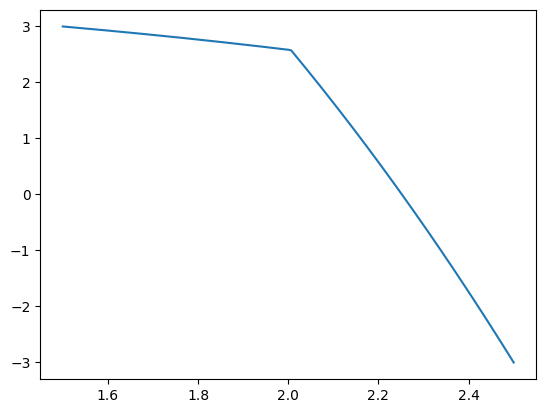

In [27]:
# 3.1 б)
def k_3_1_b(x):
    k1 = 10*k(x)
    k2 = 1*k(x)
    if a <= x <= 0.5*(b + a):
        return k1
    if 0.5*(a+b) < x <= b:
        return k2

x, U = finite_difference_variable_k(N, k_3_1_b, f)
plt.plot(x, U)
# plt.axis('equal')

(да, я очень долго проверяла. График действительно такой...)

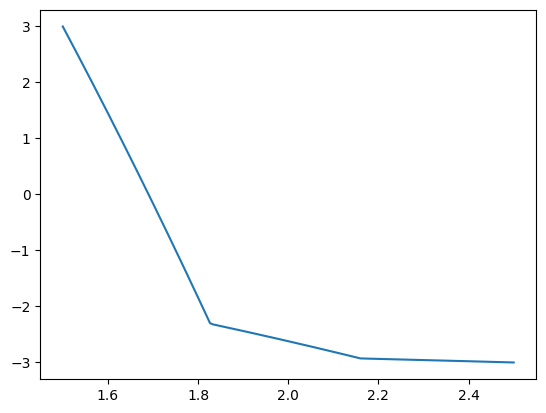

In [28]:
# 3.2. а) k1 < k2 < k3
def k_3_2_a(x):
    k1 = 1*k(x)
    k2 = 10*k(x)
    k3 = 100*k(x)
    if a <= x <= a+(b-a)/3:
        return k1
    if a+(b-a)/3 <= x <= a + 2*(b-a)/3:
        return k2
    if a+2*(b-a)/3 < x <= b:
        return k3

x, U = finite_difference_variable_k(N, k_3_2_a, f)
plt.plot(x, U)

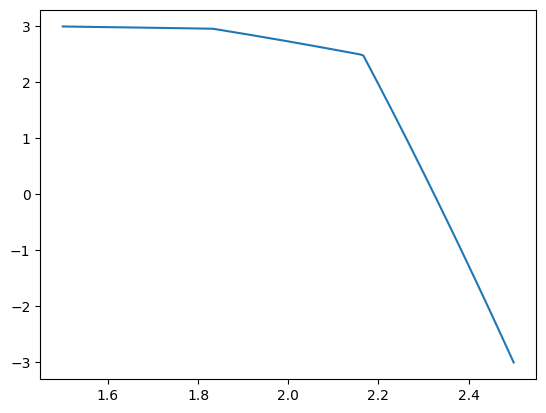

In [30]:
# 3.2. б) k1 > k2 > k3
def k_3_2_b(x):
    k1 = 100*k(x)
    k2 = 10*k(x)
    k3 = 1*k(x)
    if a <= x <= a+(b-a)/3:
        return k1
    if a+(b-a)/3 <= x <= a + 2*(b-a)/3:
        return k2
    if a+2*(b-a)/3 < x <= b:
        return k3

x, U = finite_difference_variable_k(N, k_3_2_b, f)
plt.plot(x, U)

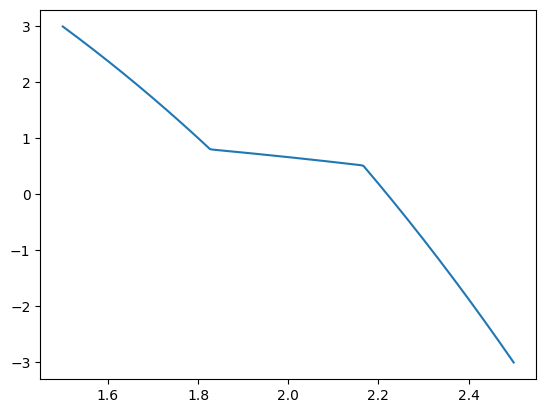

In [29]:
# 3.2. в) k1 = k3 = k, k2 = 10k
def k_3_2_c(x):
    k1 = 1*k(x)
    k2 = 10*k(x)
    k3 = 1*k(x)
    if a <= x <= a+(b-a)/3:
        return k1
    if a+(b-a)/3 <= x <= a + 2*(b-a)/3:
        return k2
    if a+2*(b-a)/3 < x <= b:
        return k3

x, U = finite_difference_variable_k(N, k_3_2_c, f)
plt.plot(x, U)

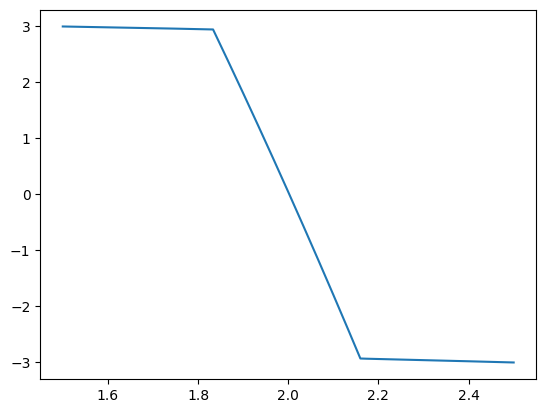

In [31]:
# 3.2. г) k1 = 100k, k2 = k, k3 = 100k
def k_3_2_d(x):
    k1 = 100*k(x)
    k2 = 1*k(x)
    k3 = 100*k(x)
    if a <= x <= a+(b-a)/3:
        return k1
    if a+(b-a)/3 <= x <= a + 2*(b-a)/3:
        return k2
    if a+2*(b-a)/3 < x <= b:
        return k3

x, U = finite_difference_variable_k(N, k_3_2_d, f)
plt.plot(x, U)

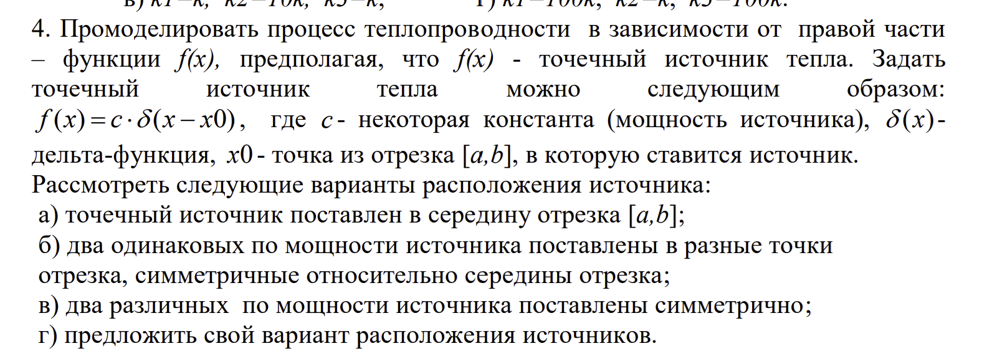

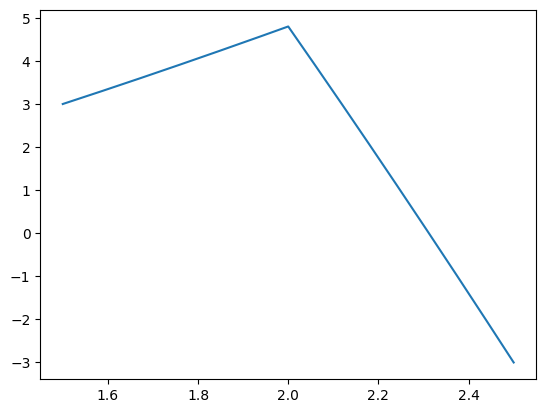

In [35]:
# 4 a) x0 = 2

c = 0.1 # Пусть будет такой

def finite_difference_variable_k_source(N, k):
    x = np.linspace(a, b, N+1)

    A = np.zeros((N+1, N+1))  # Матрица коэффициентов
    B = np.zeros(N+1)  # Правая часть

    # Заполняем систему уравнений
    for i in range(1, N):
        k_i_p_half = (k(x[i]) + k(x[i+1])) / 2  # k_{i+1/2}
        k_i_m_half = (k(x[i]) + k(x[i-1])) / 2  # k_{i-1/2}

        A[i, i-1] = -k_i_m_half / h**2
        A[i, i] = (k_i_p_half + k_i_m_half) / h**2
        A[i, i+1] = -k_i_p_half / h**2

        x_0 = (a + b) / 2
        i_0 = np.argmin(np.abs(x - x_0))  # Индекс ближайшего узла
        B[i_0] += c / h  # Добавляем источник тепла

    # Граничные условия
    A[0, 0] = 1
    B[0] = UA

    A[N, N] = 1
    B[N] = UB

    u = np.linalg.solve(A, B)

    return x, u  # Возвращаем значения u (решение) и x (узлы)


x, U = finite_difference_variable_k_source(N, k)
plt.plot(x,U)

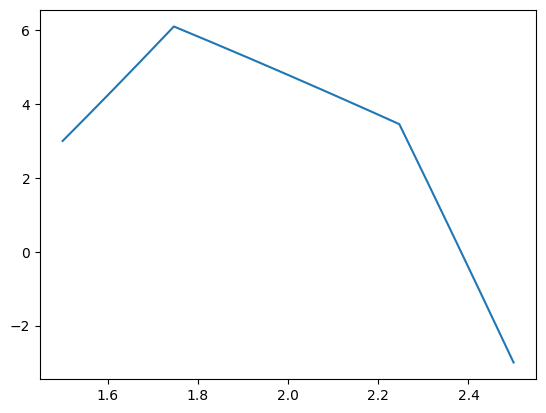

In [36]:
# 4 б) c1=c2, x01 и xo2 в симметричных относительно центра точках отрезка

def finite_difference_variable_k_source(N, k):
    x = np.linspace(a, b, N+1)

    A = np.zeros((N+1, N+1))  # Матрица коэффициентов
    B = np.zeros(N+1)  # Правая часть

    # Заполняем систему уравнений
    for i in range(1, N):
        k_i_p_half = (k(x[i]) + k(x[i+1])) / 2  # k_{i+1/2}
        k_i_m_half = (k(x[i]) + k(x[i-1])) / 2  # k_{i-1/2}

        A[i, i-1] = -k_i_m_half / h**2
        A[i, i] = (k_i_p_half + k_i_m_half) / h**2
        A[i, i+1] = -k_i_p_half / h**2

        x_1 = a + (b - a) / 4
        x_2 = b - (b - a) / 4
        i_1 = np.argmin(np.abs(x - x_1))
        i_2 = np.argmin(np.abs(x - x_2))
        B[i_1] += c / h  # Источник в точке x_1
        B[i_2] += c / h  # Источник в точке x_2

    # Граничные условия
    A[0, 0] = 1
    B[0] = UA

    A[N, N] = 1
    B[N] = UB

    u = np.linalg.solve(A, B)

    return x, u  # Возвращаем значения u (решение) и x (узлы)


x, U = finite_difference_variable_k_source(N, k)
plt.plot(x,U)

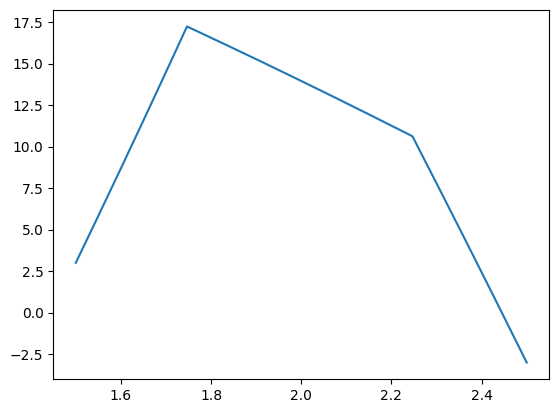

In [39]:
#4 в) c1 != c2, расставлены симметрично

def finite_difference_variable_k_source(N, k):
    x = np.linspace(a, b, N+1)

    A = np.zeros((N+1, N+1))  # Матрица коэффициентов
    B = np.zeros(N+1)  # Правая часть

    # Заполняем систему уравнений
    for i in range(1, N):
        k_i_p_half = (k(x[i]) + k(x[i+1])) / 2  # k_{i+1/2}
        k_i_m_half = (k(x[i]) + k(x[i-1])) / 2  # k_{i-1/2}

        A[i, i-1] = -k_i_m_half / h**2
        A[i, i] = (k_i_p_half + k_i_m_half) / h**2
        A[i, i+1] = -k_i_p_half / h**2

        x_1 = a + (b - a) / 4
        x_2 = b - (b - a) / 4
        i_1 = np.argmin(np.abs(x - x_1))
        i_2 = np.argmin(np.abs(x - x_2))
        c1 = 4 * c
        c2 = 2 * c
        B[i_1] += c1 / h  # Источник в точке x_1 с мощностью c1
        B[i_2] += c2 / h  # Источник в точке x_2 с мощностью c2

    # Граничные условия
    A[0, 0] = 1
    B[0] = UA

    A[N, N] = 1
    B[N] = UB

    u = np.linalg.solve(A, B)

    return x, u  # Возвращаем значения u (решение) и x (узлы)

x, U = finite_difference_variable_k_source(N, k)
plt.plot(x,U)

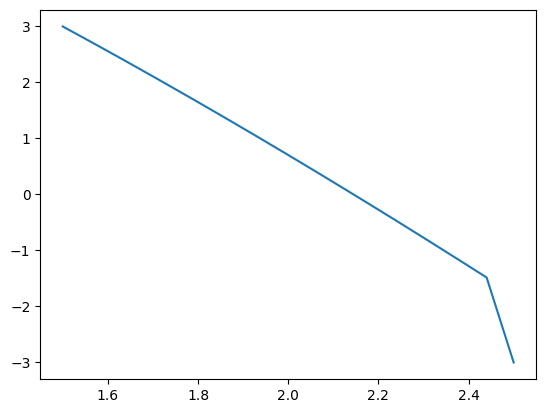

In [40]:
#4 в) свой вариант расположения источника

def finite_difference_variable_k_source(N, k):
    x = np.linspace(a, b, N+1)

    A = np.zeros((N+1, N+1))  # Матрица коэффициентов
    B = np.zeros(N+1)  # Правая часть

    # Заполняем систему уравнений
    for i in range(1, N):
        k_i_p_half = (k(x[i]) + k(x[i+1])) / 2  # k_{i+1/2}
        k_i_m_half = (k(x[i]) + k(x[i-1])) / 2  # k_{i-1/2}

        A[i, i-1] = -k_i_m_half / h**2
        A[i, i] = (k_i_p_half + k_i_m_half) / h**2
        A[i, i+1] = -k_i_p_half / h**2

        B[-10] += c / h  # Источник в точке x_0 = b - 10/N

    # Граничные условия
    A[0, 0] = 1
    B[0] = UA

    A[N, N] = 1
    B[N] = UB

    u = np.linalg.solve(A, B)

    return x, u  # Возвращаем значения u (решение) и x (узлы)

x, U = finite_difference_variable_k_source(N, k)
plt.plot(x,U)